In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import seaborn as sns

dataset = []
df = None

def set_hostnames (number_of_hosts):
    
    Caracter1 = ['L', 'S', 'A', 'H']
    Probabilidades1 = [0.4, 0.3, 0.2, 0.1]
    Caracter2 = ['D', 'I', 'T', 'S', 'P']
    Probabilidades2 = [0.1, 0.1, 0.25, 0.25, 0.3]
    Caracter3 = ['NOR', 'FRA', 'ITA', 'ESP', 'DEU', 'IRL']
    Probabilidades3 = [0.06, 0.09, 0.16, 0.16, 0.23, 0.3]
    L = []
    for i in range(number_of_hosts):
        
        hostname = (np.random.choice( Caracter1, p = Probabilidades1) + np.random.choice( Caracter2, p = Probabilidades2) +
                    np.random.choice( Caracter3, p = Probabilidades3))
        conteo = 1
        
        for elemento in L:
            if elemento.startswith(hostname):
                conteo += 1
                #Limita el conteo a un máximo de 999
                if conteo == 999:
                    break

        L.append(hostname + f'{conteo:03}')

    return L
        
            
def get_os(hostname):
    
    if hostname.startswith('L'):
        return 'Linux'

    elif hostname.startswith('S'):
        return 'Solaris'

    elif hostname.startswith('A'):
        return 'AIX'

    elif hostname.startswith('H'):
        return 'HP-UX'

    else:
        return 'Unknow'


def get_enviroment(hostname):

    if hostname[1] == 'P':
        return 'Production'

    elif hostname[1] == 'S':
        return 'Staging'

    elif hostname[1] == 'T':
        return 'Testing'

    elif hostname[1] == 'I':
        return 'Integration'

    elif hostname[1] == 'D':
        return 'Development'
         
    else:
        return 'Unknow'


                    
def get_country(hostname):

    if hostname[2:5] == 'IRL':
        return 'Ireland'

    elif hostname[2:5] == 'DEU':
        return 'Germany'

    elif hostname[2:5] == 'ESP':
        return 'Spain'

    elif hostname[2:5] == 'ITA':
        return 'Italy'

    elif hostname[2:5] == 'FRA':
        return 'France'

    elif hostname[2:5] == 'NOR':
        return 'Norway'
         
    else:
        return 'Unknow'        



def set_dataframe(count):

    global dataset
    global df

    L = set_hostnames(count)

    for hostname in L:

        dataset.append({'hostname': hostname, 'os': get_os(hostname) , 'enviroment': get_enviroment(hostname),
                        'country': get_country(hostname) , 'node': int(hostname[-3:])})

    df = pd.DataFrame(dataset)



set_dataframe(1500)

df

,hostname,os,enviroment,country,node
0,ASESP001,AIX,Staging,Spain,1
1,HPIRL001,HP-UX,Production,Ireland,1
2,LPIRL001,Linux,Production,Ireland,1
3,SDDEU001,Solaris,Development,Germany,1
4,SIDEU001,Solaris,Integration,Germany,1
...,...,...,...,...,...
1495,LSITA019,Linux,Staging,Italy,19
1496,LPESP034,Linux,Production,Spain,34
1497,SSESP014,Solaris,Staging,Spain,14
1498,APESP015,AIX,Production,Spain,15


In [14]:
df.to_csv(
    r'hosts.csv',
    header = True,
    index= False)

hosts_df = pd.read_csv(r'hosts.csv',
                       encoding='ISO-8859-1')
hosts_df

,hostname,os,enviroment,country,node
0,ASESP001,AIX,Staging,Spain,1
1,HPIRL001,HP-UX,Production,Ireland,1
2,LPIRL001,Linux,Production,Ireland,1
3,SDDEU001,Solaris,Development,Germany,1
4,SIDEU001,Solaris,Integration,Germany,1
...,...,...,...,...,...
1495,LSITA019,Linux,Staging,Italy,19
1496,LPESP034,Linux,Production,Spain,34
1497,SSESP014,Solaris,Staging,Spain,14
1498,APESP015,AIX,Production,Spain,15


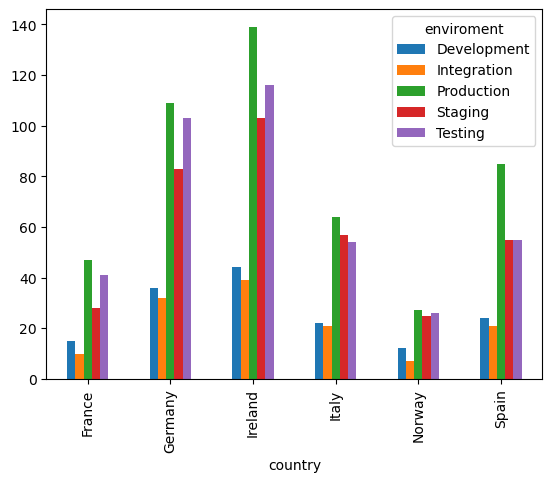

In [16]:
h_country_by_env = hosts_df.groupby(['country', 'enviroment']).size()
h_country_by_env.unstack().plot(kind='bar')
plt.show()

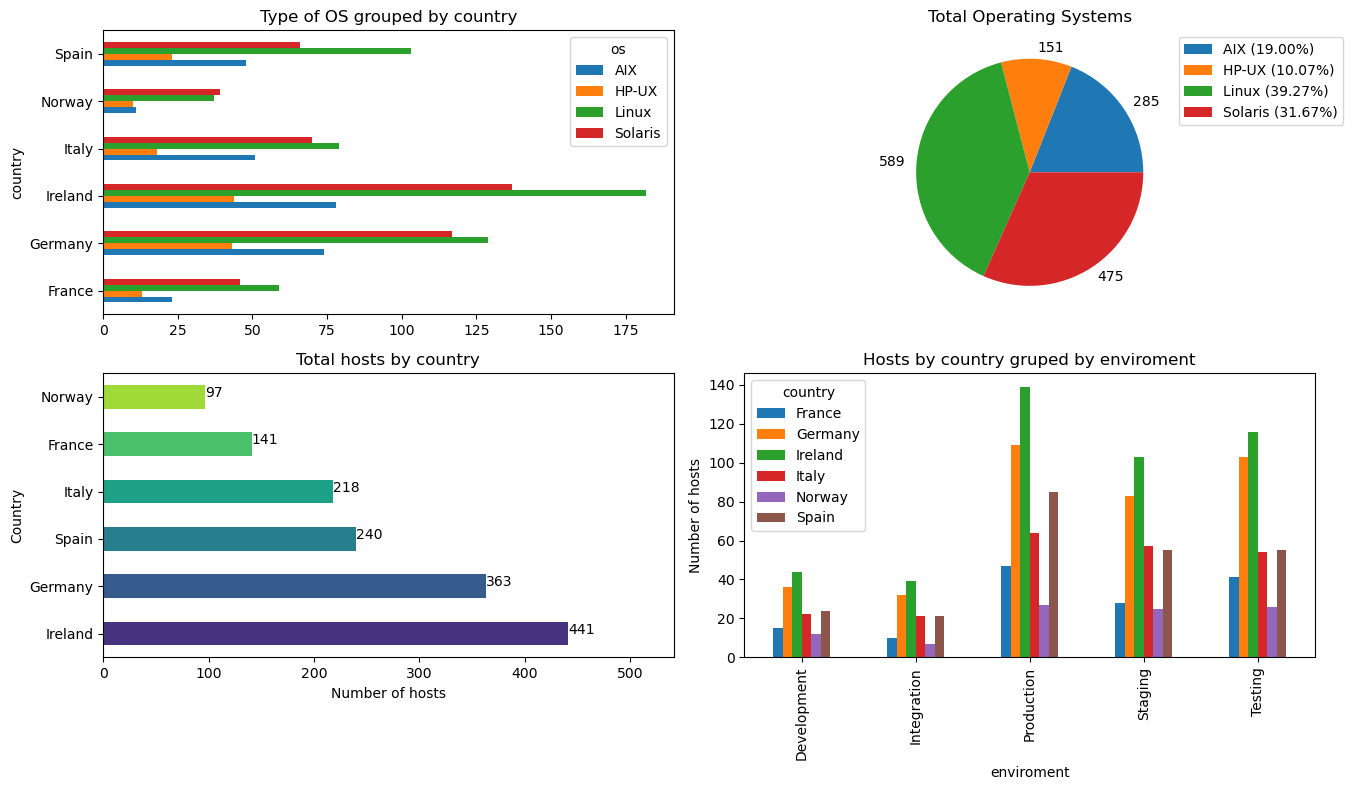

In [18]:
fig, axs = plt.subplots(2, 2, figsize = (14,8))

# axs[0, 0]
h_os_by_country = hosts_df.groupby(['country', 'os']).size()
h_os_by_country.unstack().plot(kind = 'barh', ax = axs[0,0])
axs[0,0].set_title('Type of OS grouped by country')

# axs[0, 1]
h_total_os = hosts_df.groupby(['os']).size()
h_total_os.plot(kind = 'pie', ax = axs[0,1], labels = h_total_os.values)
axs[0, 1].set_title('Total Operating Systems')
porcentajes = (h_total_os / h_total_os.sum()) * 100
legend = [f'{label} ({pct:.2f}%)' for label, pct in zip(h_total_os.index, porcentajes)]
axs[0, 1].legend(legend, bbox_to_anchor=(1, 1), loc = 'upper left')

# axs[1, 0]
h_total_hosts = hosts_df['country'].value_counts()
paleta = sns.color_palette("viridis", n_colors = len(h_total_hosts))
colores = [paleta[i] for i in range(len(h_total_hosts))]
h_total_hosts.plot(kind = 'barh', ax = axs[1, 0], color = colores)

for index, value in enumerate(h_total_hosts.values):
    axs[1, 0].text(value, index, str(value))

axs[1, 0].set_title('Total hosts by country')
axs[1, 0].set_xlabel('Number of hosts')
axs[1, 0].set_ylabel('Country')
axs[1, 0].set_xlim(0, max(h_total_hosts.values) + 100)

# axs[1, 1]
h_country_by_enviroment = hosts_df.groupby(['country','enviroment']).size()
h_country_by_enviroment.unstack(0).plot(kind = 'bar', ax = axs[1, 1])
axs[1, 1].set_title('Hosts by country gruped by enviroment')
axs[1, 1].set_ylabel('Number of hosts')

fig.tight_layout()
plt.show()